In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
!apt -qq -y install fonts-nanum
fontpath = "/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf"
font = fm.FontProperties(fname=fontpath, size=14).get_name()
print(font)
plt.rc("font", family=font)
fm._rebuild()
mpl.rcParams["axes.unicode_minus"]

import seaborn as sns
plt.style.use("fivethirtyeight")

from plotnine import *

import folium

import warnings
warnings.filterwarnings("ignore")

fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.
NanumBarunGothic


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/아시아경제/공모전/KS_PTDRCTOR_PSEXAM_INFO_202205.csv")
data.head()

,USR_NO,QF_GRADE_NM,QF_ITM_NM,AQ_DT,WRDN_EFC_YY,COUR_NM,WRDN_TOT_GRDE,PRTC_EFC_YY,PRTC_TOT_GRDE,ORST_TOT_GRDE,SATR_EFC_YY,SATR_ATND_PTM,ADD1
0,C000000001,2급 생활스포츠지도사,수영,20020822,NaN,NaN,NaN,NaN,NaN,NaN,2002,NaN,서울
1,C000000003,2급 전문스포츠지도사,펜싱,19861230,NaN,NaN,NaN,NaN,NaN,NaN,1986,NaN,서울
2,C000000009,2급 생활스포츠지도사,골프,19940120,NaN,NaN,NaN,NaN,NaN,NaN,1994,NaN,대구
3,C000000011,2급 생활스포츠지도사,우슈,19901001,NaN,NaN,NaN,NaN,NaN,NaN,1990,NaN,경기
4,C000000012,2급 생활스포츠지도사,활기도,19911231,NaN,NaN,NaN,NaN,NaN,NaN,1991,NaN,대전


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337533 entries, 0 to 337532
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   USR_NO         337533 non-null  object 
 1   QF_GRADE_NM    337533 non-null  object 
 2   QF_ITM_NM      337533 non-null  object 
 3   AQ_DT          337533 non-null  int64  
 4   WRDN_EFC_YY    84401 non-null   float64
 5   COUR_NM        204614 non-null  object 
 6   WRDN_TOT_GRDE  33774 non-null   float64
 7   PRTC_EFC_YY    102483 non-null  float64
 8   PRTC_TOT_GRDE  102483 non-null  float64
 9   ORST_TOT_GRDE  102483 non-null  float64
 10  SATR_EFC_YY    337533 non-null  int64  
 11  SATR_ATND_PTM  77751 non-null   float64
 12  ADD1           131109 non-null  object 
dtypes: float64(6), int64(2), object(5)
memory usage: 33.5+ MB


In [ ]:
data.isnull().sum()

USR_NO                0
QF_GRADE_NM           0
QF_ITM_NM             0
AQ_DT                 0
WRDN_EFC_YY      253132
COUR_NM          132919
WRDN_TOT_GRDE    303759
PRTC_EFC_YY      235050
PRTC_TOT_GRDE    235050
ORST_TOT_GRDE    235050
SATR_EFC_YY           0
SATR_ATND_PTM    259782
ADD1             206424
dtype: int64

#데이터 재정의

- QF_GRADE_NM: 자격등급명
- QF_ITM_NM: 자격종목명
- AQ_DT: 자격취득일자
- STAR_EFC_YY
- ADD1: 지역

In [ ]:
add1 = data["ADD1"].values.tolist()
df = data.dropna(axis=1)
df["ADD1"] = add1
df.head()

,USR_NO,QF_GRADE_NM,QF_ITM_NM,AQ_DT,SATR_EFC_YY,ADD1
0,C000000001,2급 생활스포츠지도사,수영,20020822,2002,서울
1,C000000003,2급 전문스포츠지도사,펜싱,19861230,1986,서울
2,C000000009,2급 생활스포츠지도사,골프,19940120,1994,대구
3,C000000011,2급 생활스포츠지도사,우슈,19901001,1990,경기
4,C000000012,2급 생활스포츠지도사,활기도,19911231,1991,대전


In [ ]:
df = df.iloc[:, 1:]
df.head()

,QF_GRADE_NM,QF_ITM_NM,AQ_DT,SATR_EFC_YY,ADD1
0,2급 생활스포츠지도사,수영,20020822,2002,서울
1,2급 전문스포츠지도사,펜싱,19861230,1986,서울
2,2급 생활스포츠지도사,골프,19940120,1994,대구
3,2급 생활스포츠지도사,우슈,19901001,1990,경기
4,2급 생활스포츠지도사,활기도,19911231,1991,대전



#자격증명 빈도 분석

In [ ]:
#자격증명 확인
grade = df["QF_GRADE_NM"].value_counts()
grade

2급 생활스포츠지도사     251456
2급 전문스포츠지도사      44668
노인스포츠지도사         12569
1급 생활스포츠지도사      10608
유소년스포츠지도사         9530
2급 장애인스포츠지도사      4720
건강운동관리사           2380
1급 전문스포츠지도사       1548
1급 장애인스포츠지도사        54
Name: QF_GRADE_NM, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

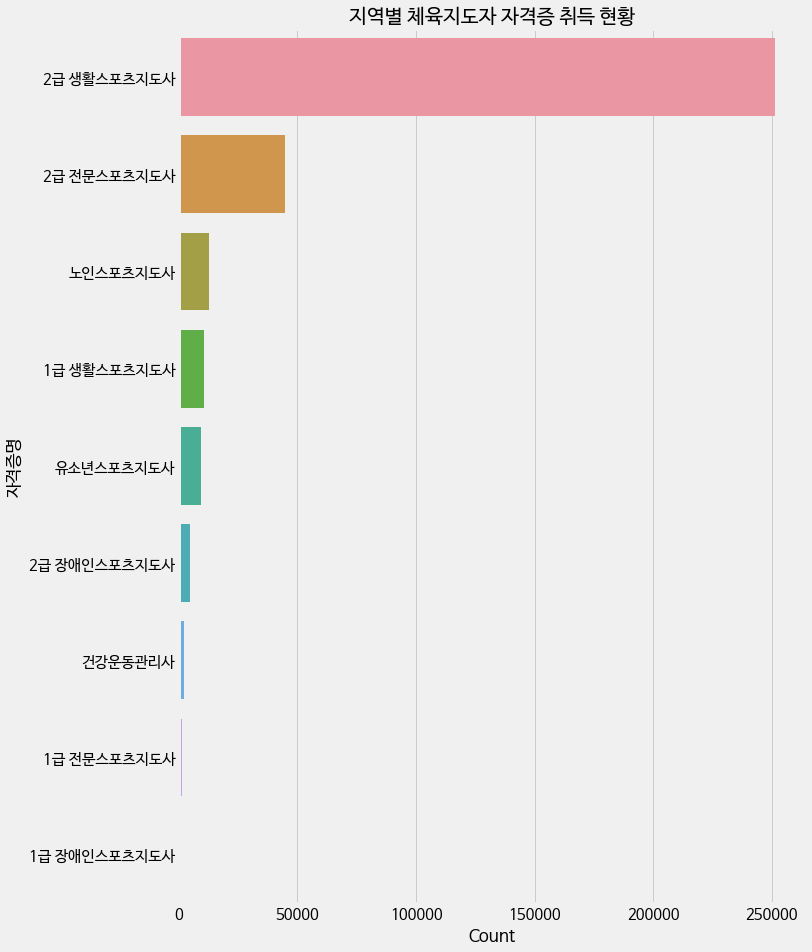

In [ ]:
plt.figure(figsize=(10, 15))
sns.barplot(x=grade.values, y=grade.index)
plt.title("지역별 체육지도자 자격증 취득 현황", size=20)
plt.xlabel("Count", fontsize=17)
plt.ylabel("자격증명", fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

#종목별 빈도분석

In [ ]:
#종목별 확인
items = df["QF_ITM_NM"].value_counts()
items

보디빌딩       94416
태권도        34948
수영         28992
배드민턴       18122
축구         17569
           ...  
스노우보드          9
도봉술            8
유술             5
태수도            3
수중(핀수영)        1
Name: QF_ITM_NM, Length: 110, dtype: int64

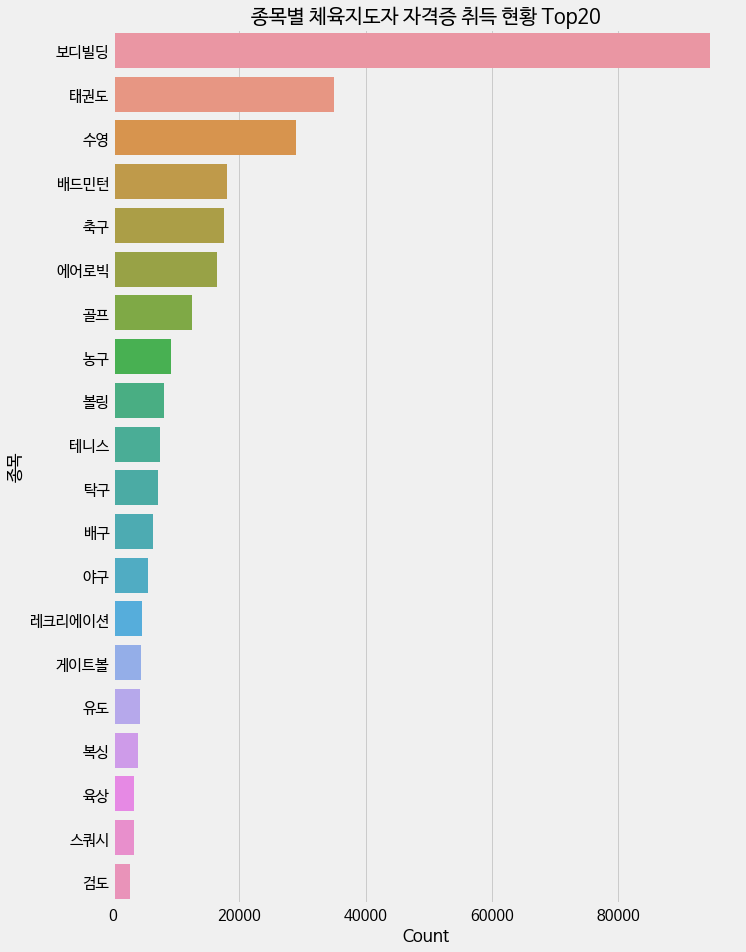

In [ ]:
plt.figure(figsize=(10, 15))
sns.barplot(x=items.values[:20], y=items.index[:20])
plt.title("종목별 체육지도자 자격증 취득 현황 Top20", size=20)
plt.xlabel("Count", fontsize=17)
plt.ylabel("종목", fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

#연도별 취득자격증 변화율

In [ ]:
df.head()

,QF_GRADE_NM,QF_ITM_NM,AQ_DT,SATR_EFC_YY,ADD1
0,2급 생활스포츠지도사,수영,20020822,2002,서울
1,2급 전문스포츠지도사,펜싱,19861230,1986,서울
2,2급 생활스포츠지도사,골프,19940120,1994,대구
3,2급 생활스포츠지도사,우슈,19901001,1990,경기
4,2급 생활스포츠지도사,활기도,19911231,1991,대전


In [ ]:
#일자 확인
df["AQ_DT"] = pd.to_datetime(df["AQ_DT"], format="%Y%m%d")
df.head()

,QF_GRADE_NM,QF_ITM_NM,AQ_DT,SATR_EFC_YY,ADD1
0,2급 생활스포츠지도사,수영,2002-08-22,2002,서울
1,2급 전문스포츠지도사,펜싱,1986-12-30,1986,서울
2,2급 생활스포츠지도사,골프,1994-01-20,1994,대구
3,2급 생활스포츠지도사,우슈,1990-10-01,1990,경기
4,2급 생활스포츠지도사,활기도,1991-12-31,1991,대전


In [ ]:
df["연도"] = df["AQ_DT"].dt.year

crt_df = pd.crosstab(df["연도"], df["QF_GRADE_NM"])
crt_df.head()
# pd.crosstab(df["AQ_DT"], df["QF_GRADE_NM"]).plot(kind="line")

QF_GRADE_NM,1급 생활스포츠지도사,1급 장애인스포츠지도사,1급 전문스포츠지도사,2급 생활스포츠지도사,2급 장애인스포츠지도사,2급 전문스포츠지도사,건강운동관리사,노인스포츠지도사,유소년스포츠지도사
연도,,,,,,,,,
1974,0,0,0,0,0,137,0,0,0
1975,0,0,17,0,0,60,0,0,0
1976,0,0,0,0,0,39,0,0,0
1977,0,0,0,0,0,36,0,0,0
1978,0,0,0,0,0,58,0,0,0


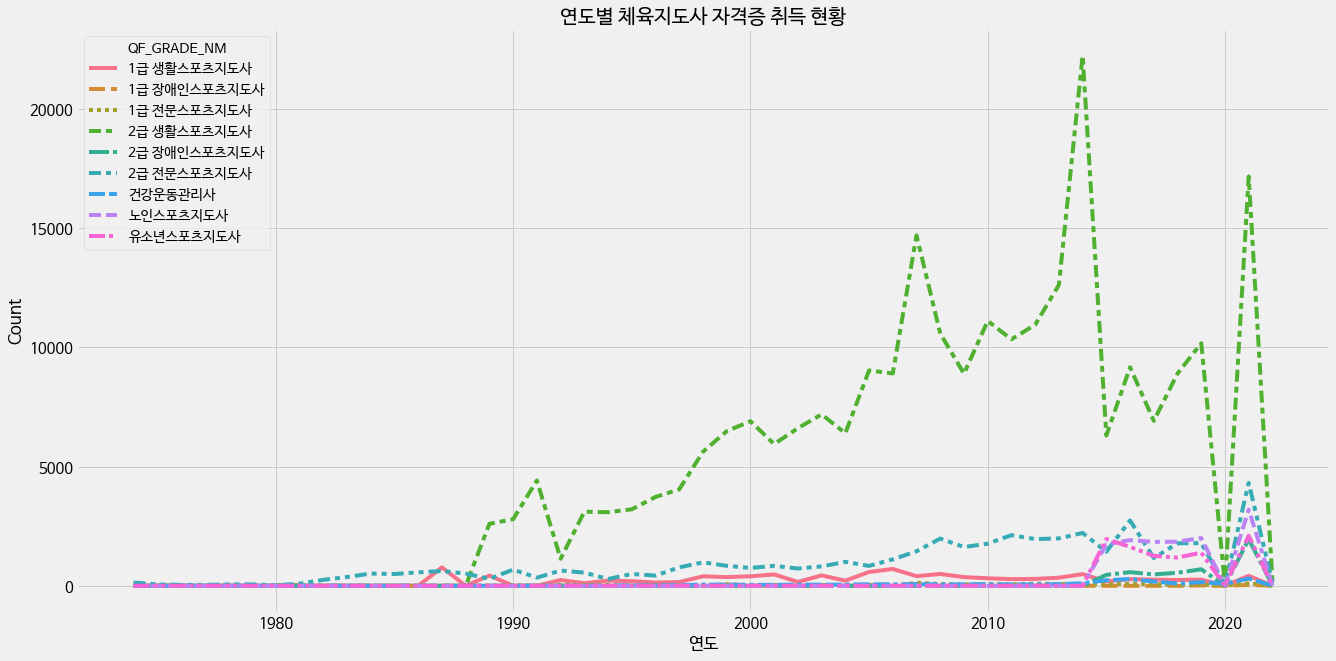

In [ ]:
plt.figure(figsize=(20, 10))
sns.lineplot(data=crt_df)
plt.title("연도별 체육지도사 자격증 취득 현황", size=20)
plt.ylabel("Count", fontsize=17)
plt.xlabel("연도", fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

#연도별 체육지도사 자격증 취득 현황(지역별)

In [ ]:
df.head()

,QF_GRADE_NM,QF_ITM_NM,AQ_DT,SATR_EFC_YY,ADD1,연도
0,2급 생활스포츠지도사,수영,2002-08-22,2002,서울,2002
1,2급 전문스포츠지도사,펜싱,1986-12-30,1986,서울,1986
2,2급 생활스포츠지도사,골프,1994-01-20,1994,대구,1994
3,2급 생활스포츠지도사,우슈,1990-10-01,1990,경기,1990
4,2급 생활스포츠지도사,활기도,1991-12-31,1991,대전,1991


In [ ]:
ct_loc = pd.crosstab(df["연도"], df["ADD1"])
ct_loc.head()

ADD1,,경기,서울,충남,강동,강원,강원도,경기,경기도,경남,...,전남,전라남도,전라북도,전북,제주,제주도,청주,충남,충북,충청북도
연도,,,,,,,,,,,,,,,,,,,,,
1974,0,0,0,0,0,2,0,10,0,6,...,11,0,0,9,0,0,0,10,4,0
1975,0,0,0,0,0,3,0,6,0,5,...,7,0,0,1,0,0,0,8,7,0
1976,0,0,0,0,0,0,0,2,0,2,...,2,0,0,2,0,0,0,2,3,0
1977,0,0,0,0,0,1,0,8,0,3,...,2,0,0,0,0,0,0,3,2,0
1978,0,0,0,0,0,3,0,7,0,4,...,4,0,0,2,1,0,0,11,1,0


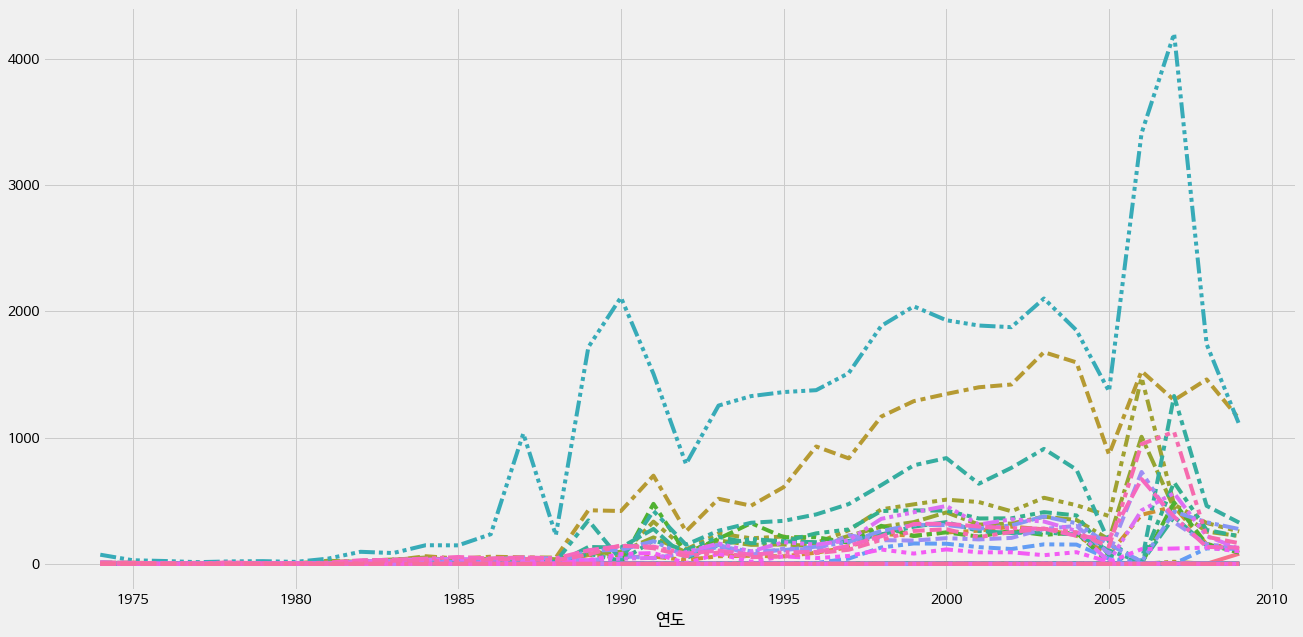

In [ ]:
plt.figure(figsize=(20, 10))
sns.lineplot(data=ct_loc, label=None)
plt.legend().remove()


In [ ]:
df["ADD1"] = df["ADD1"].str.replace(" ", "")
replace_dict = {"서울": "서울특별시",
 "경기": "경기도",
 "부산": "부산광역시",
 "경남": "경상남도",
 "경북": "경상북도",
 "대구": "대구광역시",
 "충북": "충청북도",
 "전북": "전라북도",
 "충남": "충청남도",
 "인천": "인천광역시",
 "전남": "전라남도",
 "광주": "광주광역시",
 "대전": "대전광역시",
 "강원": "강원도",
 "제주": "제주특별자치도",
 "울산": "울산광역시",
 "강동": "서울특별시",
 "구리": "경기도",
 "수원": "경기도",
 "서울시": "서울특별시",
 "광진": "서울특별시",
 "부산시": "부산광역시",
 "순천": "전라남도",
 "부천": "경기도",
 "청주": "충청북도",
 "제주도": "제주특별자치도",
 "남양": "전라남도",
 "용인": "경기도" 
 }

df["ADD1"] = df["ADD1"].replace(replace_dict)
df["ADD1"] = df["ADD1"].replace("", "서울특별시")
df["ADD1"].value_counts()

서울특별시      40611
경기도        21712
부산광역시      10498
경상남도        8177
경상북도        6127
대구광역시       5505
충청북도        5218
전라북도        5024
충청남도        4738
인천광역시       4511
전라남도        4144
광주광역시       4131
대전광역시       4045
강원도         3716
제주특별자치도     1611
울산광역시       1341
Name: ADD1, dtype: int64

In [ ]:
#위도 경도 구하기
from geopy.geocoders import Nominatim

def geocoding(address):
    geolocoder = Nominatim(user_agent = 'South Korea', timeout=None)
    geo = geolocoder.geocode(address)
    crd = {"lat": str(geo.latitude), "lng": str(geo.longitude)}

    return crd

# crd = geocoding("전남")
print(geocoding("서울특별시"))
print(geocoding("경기도"))
print(geocoding("전라남도"))
# print(crd['lat'])
# print(crd['lng'])

{'lat': '37.5666791', 'lng': '126.9782914'}
{'lat': '37.2752', 'lng': '127.0095'}
{'lat': '34.8159', 'lng': '126.4629'}


In [ ]:
df.head()

,QF_GRADE_NM,QF_ITM_NM,AQ_DT,SATR_EFC_YY,ADD1,연도
0,2급 생활스포츠지도사,수영,2002-08-22,2002,서울특별시,2002
1,2급 전문스포츠지도사,펜싱,1986-12-30,1986,서울특별시,1986
2,2급 생활스포츠지도사,골프,1994-01-20,1994,대구광역시,1994
3,2급 생활스포츠지도사,우슈,1990-10-01,1990,경기도,1990
4,2급 생활스포츠지도사,활기도,1991-12-31,1991,대전광역시,1991


In [ ]:
geo_df = list = []
for i in df["ADD1"].unique():
  geo_dict = geocoding(i)
  geo_df.append(pd.DataFrame(geo_dict, index=[i]))

total_geo_df = pd.concat(geo_df)
total_geo_df.head()

,lat,lng
서울특별시,37.5666791,126.9782914
대구광역시,35.8713,128.6018
경기도,37.2752,127.0095
대전광역시,36.3496,127.3848
제주특별자치도,33.4887737,126.4987083


In [ ]:
#데이터프레임 합치기
df = df.merge(total_geo_df, left_on="ADD1", right_on=total_geo_df.index, how="outer")
df.head()

,QF_GRADE_NM,QF_ITM_NM,AQ_DT,SATR_EFC_YY,ADD1,연도,lat,lng
0,2급 생활스포츠지도사,수영,2002-08-22,2002,서울특별시,2002,37.5666791,126.9782914
1,2급 전문스포츠지도사,펜싱,1986-12-30,1986,서울특별시,1986,37.5666791,126.9782914
2,2급 생활스포츠지도사,활법,1991-09-25,1991,서울특별시,1991,37.5666791,126.9782914
3,2급 전문스포츠지도사,볼링,1993-09-14,1993,서울특별시,1993,37.5666791,126.9782914
4,2급 생활스포츠지도사,골프,1997-08-25,1997,서울특별시,1997,37.5666791,126.9782914


In [ ]:
df.to_csv("지역별_체육지도자자격증_취득현황.csv")

In [ ]:
#지역 전처리
df["ADD1"] = df["ADD1"].str.replace(" ", "")
df["ADD1"] = df["ADD1"].replace({"경상남도": "경남",
                                 "강동": "서울",
                                 "구리": "경기",
                                 "충청북도": "충북",
                                 "수원": "경기",
                                 "전라북도": "전북",
                                 "서울시": "서울",
                                 "광진": "서울",
                                 "청주": "충남",
                                 "부산시": "경남",
                                 "제주도": "제주",
                                 "경상북도": "경북",
                                 "전라남도": "전남",
                                 "남양": "전남",
                                 "용인": "경기",
                                 "순천": "전남",
                                 "부천": "경기"})
print(df["ADD1"].value_counts())

서울특별시      40611
경기도        21712
부산광역시      10498
경남          8177
경북          6127
대구광역시       5505
충북          5218
전북          5024
충청남도        4738
인천광역시       4511
전남          4144
광주광역시       4131
대전광역시       4045
강원도         3716
제주특별자치도     1611
울산광역시       1341
Name: ADD1, dtype: int64


- QF_GRADE_NM: 자격등급명
- QF_ITM_NM: 자격종목명
- AQ_DT: 자격취득일자
- STAR_EFC_YY

#체력현황

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import os
import numpy as np
import pandas as pd

In [ ]:
parent = "/content/drive/MyDrive/아시아경제/공모전/국민체력측정 현황 데이터"

data = []
for p in os.listdir(parent):
  path = os.path.join(parent, p)
  data.append(pd.read_csv(path, parse_dates=["TEST_YMD"]))

df = pd.concat(data, axis=0)
print(df.shape)
df.head()

(1141723, 9)


,TEST_CNT,CENTER_NM,AGE_GBN,TEST_GBN,TEST_AGE,INPUT_GBN,CERT_GBN,TEST_YMD,TEST_SEX
0,1,강북,성인,일반,19.0,측정기기,참가증,2021-08-02,M
1,3,의정부,성인,일반,20.0,관리자,참가증,2021-08-02,M
2,1,안산,성인,일반,23.0,관리자,3등급,2021-08-02,M
3,2,창원마산회원,노인,출장,74.0,관리자,3등급,2021-08-02,F
4,2,군산,성인,일반,19.0,관리자,참가증,2021-08-02,F


In [ ]:
df["CERT_GBN"].value_counts()

참가증    692726
3등급    240074
2등급    146487
1등급     62253
참가상       161
금상         11
동상          7
은상          4
Name: CERT_GBN, dtype: int64

In [ ]:
#참가증, 1등급, 2등급, 3등급인 사람들만 추출
# cond1 = df["CERT_GBN"] == "참가증"
cond2 = df["CERT_GBN"] == "1등급"
cond3 = df["CERT_GBN"] == "2등급"
cond4 = df["CERT_GBN"] == "3등급"

df = df[(cond2)|(cond3)|(cond4)]
print(df.shape)
# df = df[(cond1 or cond2 or cond3 or cond4)]
# print(df.shape)

(448814, 10)


In [ ]:
df.head()

,TEST_CNT,CENTER_NM,AGE_GBN,TEST_GBN,TEST_AGE,INPUT_GBN,CERT_GBN,TEST_YMD,TEST_SEX,yaer
2,1,안산,성인,일반,23.0,관리자,3등급,2021-08-02,M,2021
3,2,창원마산회원,노인,출장,74.0,관리자,3등급,2021-08-02,F,2021
8,1,삼척,성인,일반,27.0,관리자,3등급,2021-08-02,M,2021
10,3,창원마산회원,노인,출장,68.0,관리자,3등급,2021-08-02,F,2021
12,2,창원마산회원,노인,출장,80.0,관리자,2등급,2021-08-02,F,2021


In [ ]:
df["yaer"] = df["TEST_YMD"].dt.year
df.head()

,TEST_CNT,CENTER_NM,AGE_GBN,TEST_GBN,TEST_AGE,INPUT_GBN,CERT_GBN,TEST_YMD,TEST_SEX,yaer
2,1,안산,성인,일반,23.0,관리자,3등급,2021-08-02,M,2021
3,2,창원마산회원,노인,출장,74.0,관리자,3등급,2021-08-02,F,2021
8,1,삼척,성인,일반,27.0,관리자,3등급,2021-08-02,M,2021
10,3,창원마산회원,노인,출장,68.0,관리자,3등급,2021-08-02,F,2021
12,2,창원마산회원,노인,출장,80.0,관리자,2등급,2021-08-02,F,2021


In [ ]:
gbn_ct = pd.crosstab(df["yaer"], df["CERT_GBN"])
gbn_ct

CERT_GBN,1등급,2등급,3등급
yaer,,,
2017,10762,26364,46766
2018,13889,33537,57393
2019,16950,38963,64640
2020,5577,12227,18904
2021,9486,21958,31451
2022,5589,13438,20920


In [ ]:
year_list = [2017, 2018, 2019, 2020, 2021]
for i in year_list:
  print((gbn_ct.loc[i,:] /gbn_ct.loc[i,:].sum()*100).round(1))
# print("2017년 1등급": 10762 / gbn_ct.loc[2017, :].sum()

CERT_GBN
1등급    12.8
2등급    31.4
3등급    55.7
Name: 2017, dtype: float64
CERT_GBN
1등급    13.3
2등급    32.0
3등급    54.8
Name: 2018, dtype: float64
CERT_GBN
1등급    14.1
2등급    32.3
3등급    53.6
Name: 2019, dtype: float64
CERT_GBN
1등급    15.2
2등급    33.3
3등급    51.5
Name: 2020, dtype: float64
CERT_GBN
1등급    15.1
2등급    34.9
3등급    50.0
Name: 2021, dtype: float64


In [ ]:
{"1등급"}

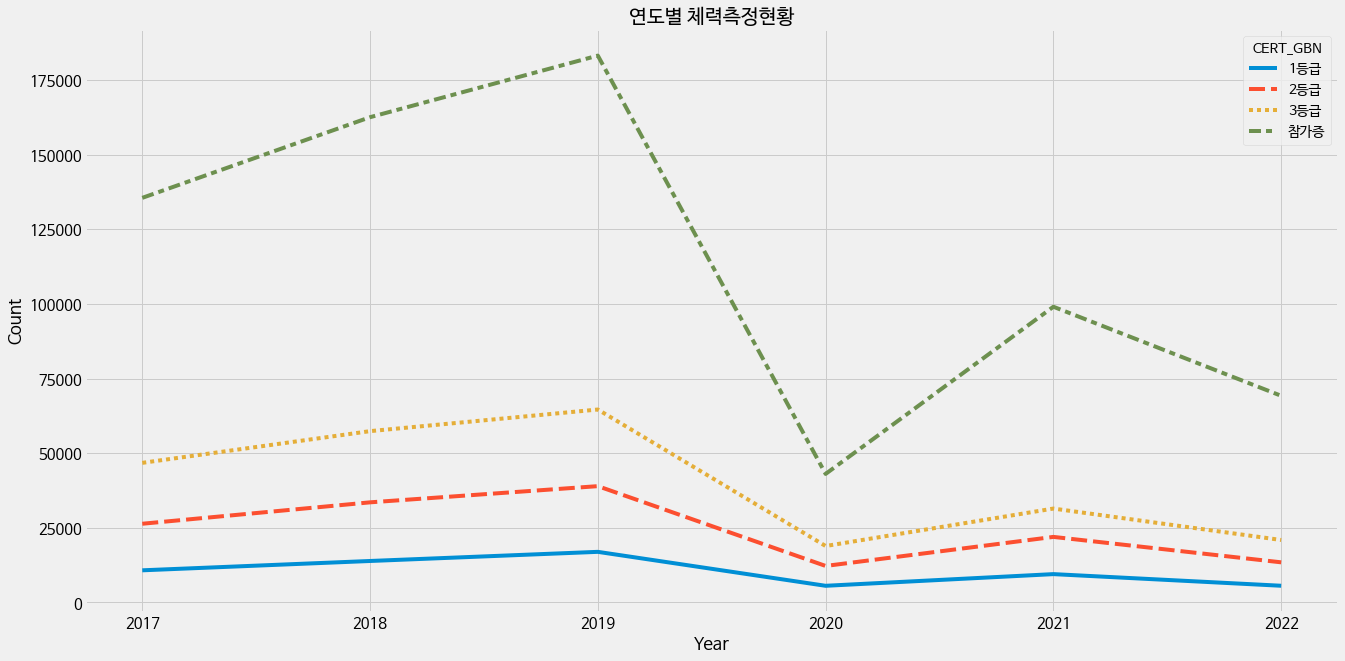

In [ ]:
gbn_ct = pd.crosstab(df["yaer"], df["CERT_GBN"])

plt.figure(figsize=(20, 10))
sns.lineplot(data=gbn_ct)
plt.title("연도별 체력측정현황", size=20)
plt.xlabel("Year", fontsize=17)
plt.ylabel("Count", fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()